# Diabetes Prediction by Shromana Majumder (02.04.24)

* To predict whether a patient might have diabetes or not. 

### Importing the Dependencies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import operator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## PIMA INDIANS AND DIABETES

Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas, and it drawed attention as they had the highest recorded prevalence and incidence of type 2 diabetes (T2DM) of any geographically-defined population (SCHULZ et al, 2015). The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.

## Data Collection and Analysis

* PIMA Indian Diabetes Dataset

### Dataset Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('diabetes.csv')

In [4]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)

In [5]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [37]:
# Get data type for each attribute 

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Features and Target

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Duplicate Values

In [78]:
df.duplicated().sum()

0

#### Missing Values

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* No missing Values

This particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset.
Hence I will first replace the 0 value with the NAN value

In [16]:
# Imputation
df_copy = df.copy(deep = True) 


In [18]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* Insulin and SkinThickness have large no of missing values

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

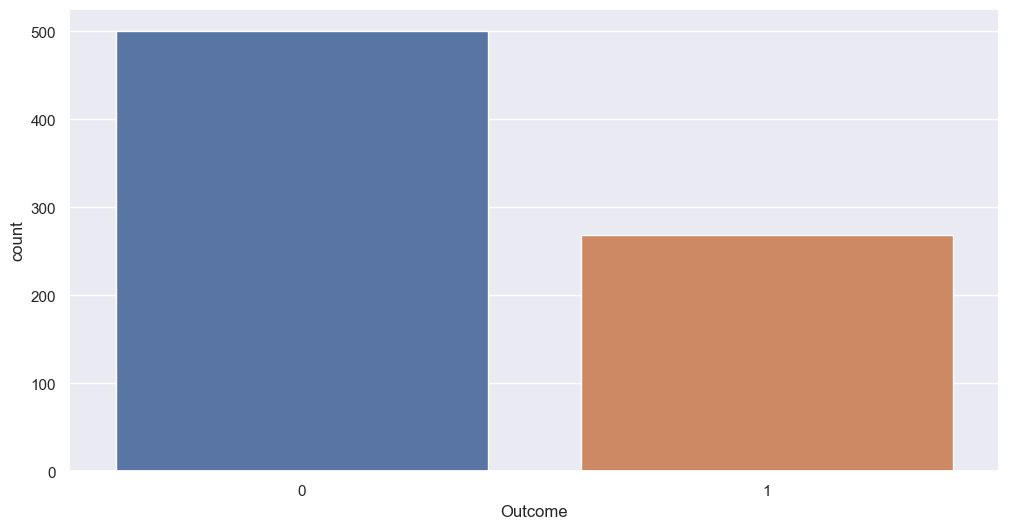

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=df)
plt.show()

0 --> Non-Diabetic

1 --> Diabetic

* Imbalanced Dataset

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


1. Higher Glucose Levels: Individuals with diabetes (Outcome = 1) tend to have higher average glucose levels (141.26 mg/dL) compared to those without diabetes (Outcome = 0) with an average glucose level of 109.98 mg/dL.

2. Blood Pressure Variation: The average blood pressure for individuals with diabetes (70.82) is slightly higher than those without diabetes (68.18), but the difference is not very significant.

3. Skin Thickness and Insulin Levels: People with diabetes appear to have slightly higher skin thickness and insulin levels compared to those without diabetes, but the difference is not drastic.

4. BMI Difference: Individuals with diabetes have a higher average BMI (35.14) compared to those without diabetes (30.30). This suggests a correlation between higher BMI and diabetes risk.

5. Diabetes Pedigree Function: The Diabetes Pedigree Function is slightly higher for individuals with diabetes (0.5505) compared to those without diabetes (0.4297). This function estimates diabetes probability based on family history.

5. Age Factor: The average age of individuals with diabetes (37.07 years).

### Replace NaN Values

In [21]:
df1=df_copy

* imputing the mean value of the column to each missing value of that particular column.

In [23]:
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace = True)


In [24]:
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)

In [25]:
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
 

In [26]:
df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)

In [28]:
df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

In [29]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Plotting Null Count Analysis Plot

<Axes: >

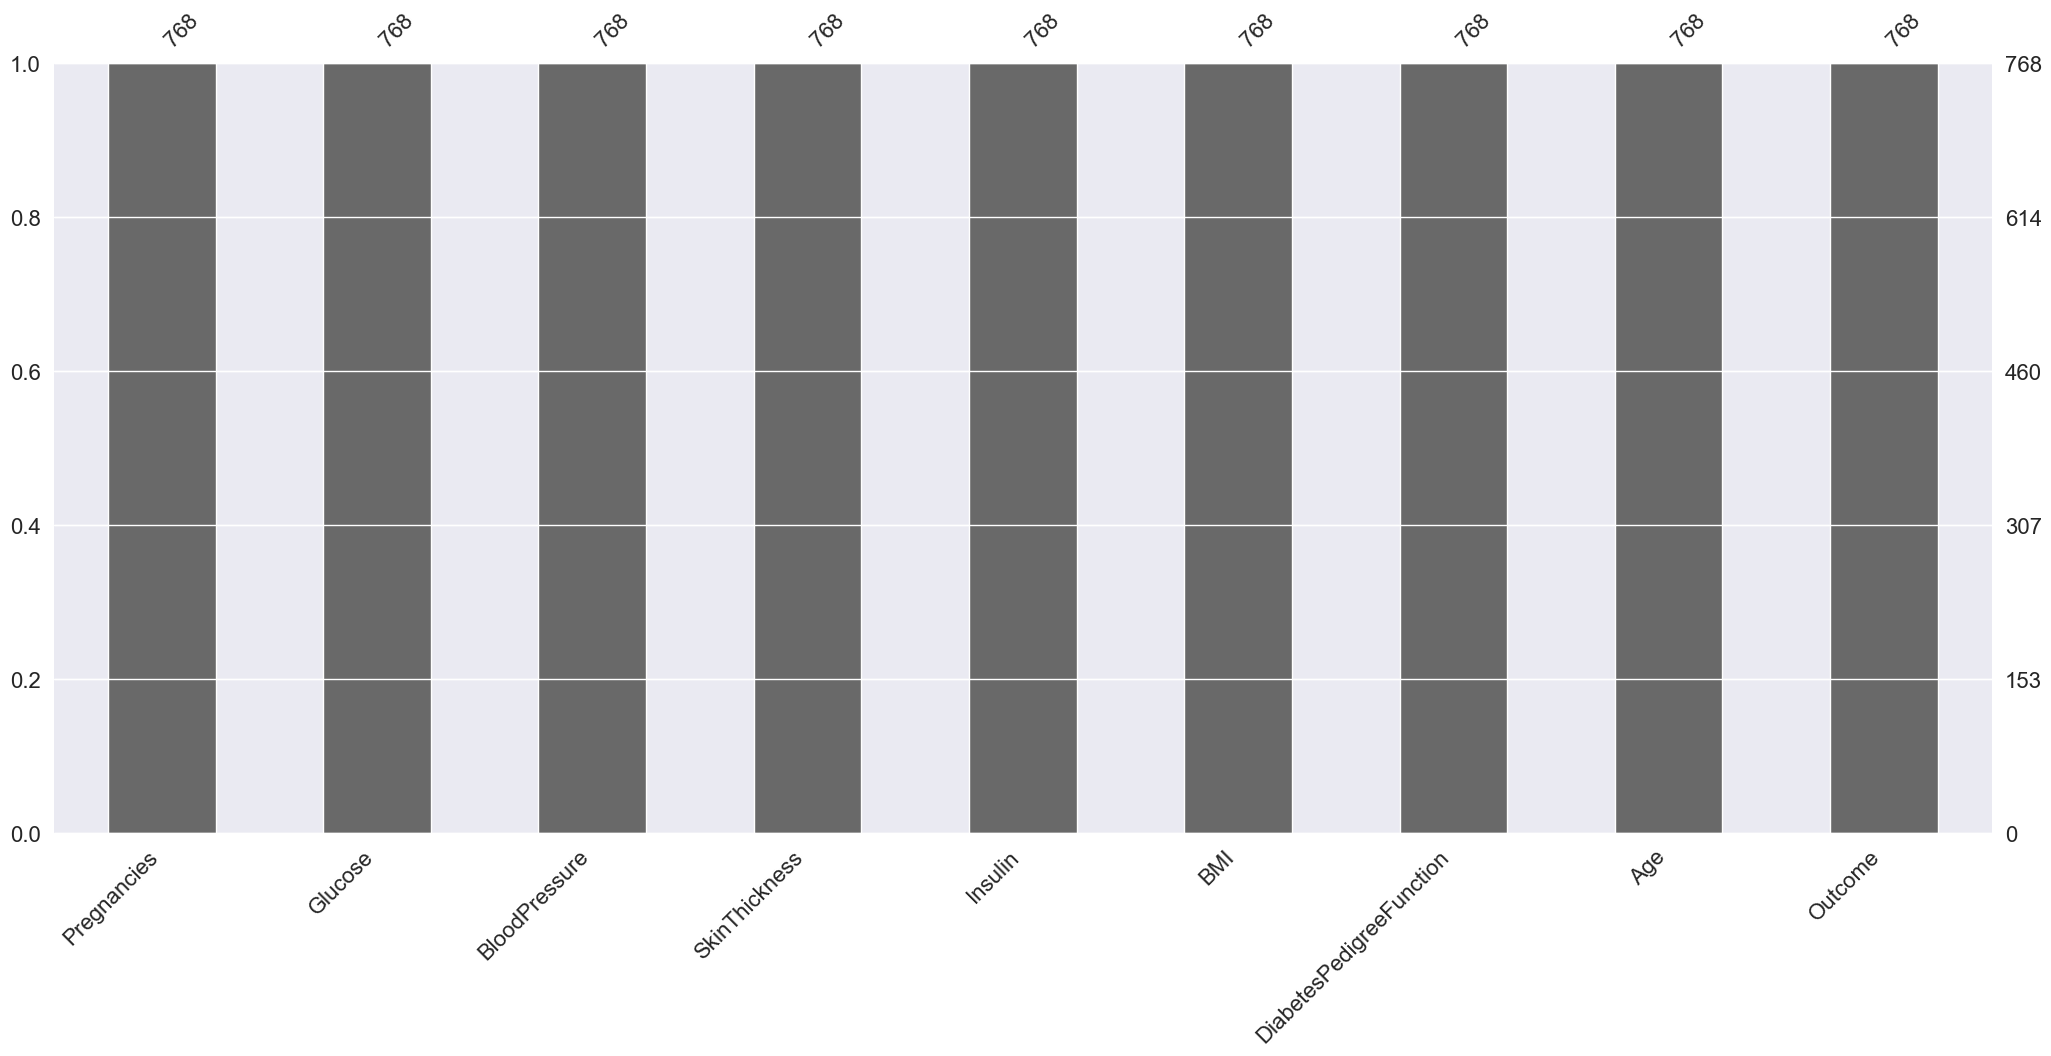

In [30]:
msno.bar(df1)

## Univariate EDA

#### Age

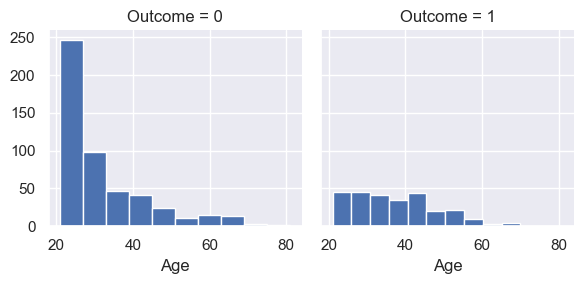

In [80]:
age=sns.FacetGrid(df1,col='Outcome')
age.map(plt.hist,'Age')

#### Pregnancies

In [81]:
df1.columns

Index(['Pregnancies', 'Glucose', 'Glucose Result', 'BloodPressure',
       'Percentile skin thickness', 'SkinThickness', 'Insulin', 'BMI',
       'Nutritional Status', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

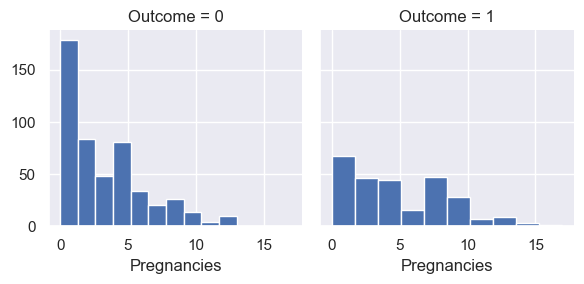

In [82]:
Pregnancies=sns.FacetGrid(df1,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')

#### DiabetesPedigreeFunction

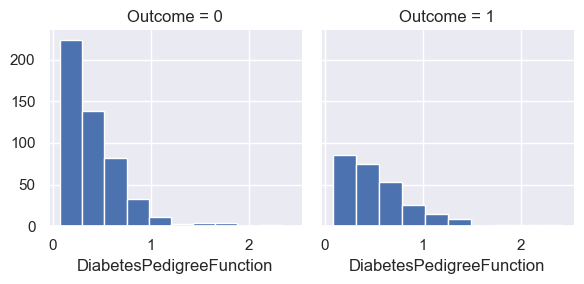

In [83]:
DiabetesPedigreeFunction=sns.FacetGrid(df1,col='Outcome')
DiabetesPedigreeFunction.map(plt.hist,'DiabetesPedigreeFunction')

##  Nutritional status based on BMI

Nutritional Status Source: World Health Organization.

In [40]:
Nutritional_status = pd.Series([]) 

In [41]:
for i in range(len(df1)): 
    if df1['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif df1['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif df1['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif df1['BMI'][i] >= 25 and df1['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif df1['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= df1['BMI'][i]

In [43]:
# Insert new column - Nutritional Status
df1.insert(6, "Nutritional Status", Nutritional_status)

In [44]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,Obese,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,Overweight,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,Normal,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,Overweight,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,Obese,2.288,33,1


In [45]:
df1['Nutritional Status'].value_counts()

Obese          483
Overweight     179
Normal         102
Underweight      4
Name: Nutritional Status, dtype: int64

* Most of the women have obese

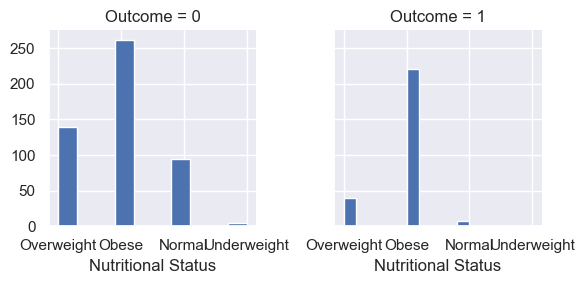

In [85]:
NutritionalStatus=sns.FacetGrid(df1,col='Outcome')
NutritionalStatus.map(plt.hist,'Nutritional Status')

## Interpretation of Glucose level(OGTT)

In [47]:
OGTT = pd.Series([]) 

In [49]:
for i in range(len(df1)): 
    if df1['Glucose'][i] == 0.0: 
        OGTT [i]="NA"
    
    elif df1['Glucose'][i] <= 140: 
        OGTT [i]="Normal"
    
    elif df1['Glucose'][i] > 140 and df1['Glucose'][i] <= 198: 
        OGTT [i]="Impaired Glucose Tolerance"
        
    elif df1['Glucose'][i] > 198: 
        OGTT [i]="Diabetic Level"
        
    else: 
        OGTT [i]= df1['Glucose'][i] 

In [50]:
# Insert new column - Glucose Result
df1.insert(2, "Glucose Result", OGTT)

In [51]:
df1['Glucose Result'].value_counts()

Normal                        576
Impaired Glucose Tolerance    191
Diabetic Level                  1
Name: Glucose Result, dtype: int64

* Not a single individual from the sample showed OGTT result at "Diabetic levels". 

In [53]:
Impaired_Glucose_Tolerance_Diabetic = ((df1 ['Glucose'] > 140 ) & (df1 ['Glucose'] <= 198) & (df1 ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

* Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.

In [54]:
Normal_Glucose_Diabetic = ((df1 ['Glucose'] != 0 ) & (df1 ['Glucose'] <= 140) & (df1 ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

136

* Half of the diabetic women showed normal glucose level.

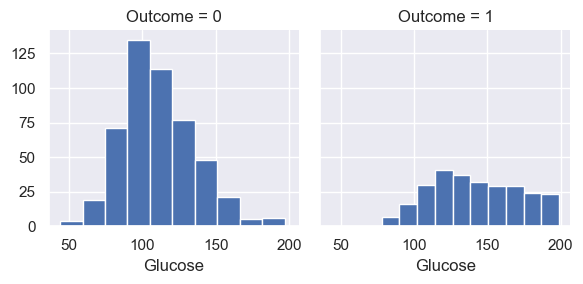

In [87]:
Glucose=sns.FacetGrid(df1,col='Outcome')
Glucose.map(plt.hist,'Glucose')

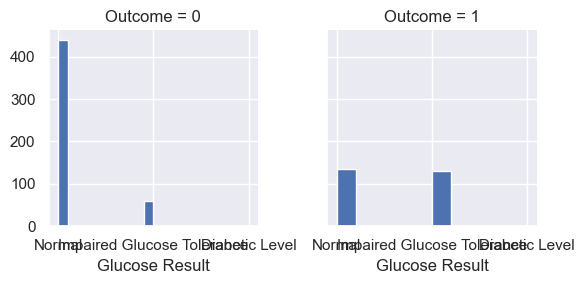

In [88]:
GlucoseResult=sns.FacetGrid(df1,col='Outcome')
GlucoseResult.map(plt.hist,'Glucose Result')

## Percentile of skin thickness column

In [55]:
Percentile_skin_thickness = pd.Series([]) 

In [56]:
#how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)

df1['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [57]:
for i in range(len(df1)): 
    
    
    if df1["Age"][i] >= 20.0 and df1["Age"][i] <= 79.0: 
        
        if df1["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif df1["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif df1["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif df1["SkinThickness"][i] > 11.9 and df1["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif df1["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        elif df1["SkinThickness"][i] > 14.0 and  df1["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif df1["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif df1["SkinThickness"][i] > 15.8 and df1["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif df1["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif df1["SkinThickness"][i] > 18.0 and df1["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif df1["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif df1["SkinThickness"][i] > 23.5 and df1["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif df1["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif df1["SkinThickness"][i] > 29.0 and df1["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif df1["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif df1["SkinThickness"][i] > 31.9 and df1["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
        elif df1["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif df1["SkinThickness"][i] > 33.7 and df1["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif df1["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif df1["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
    elif df1["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  df1["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"

In [58]:
# Insert new column - Percentile of skin thickness

df1.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [59]:
df1.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,Impaired Glucose Tolerance,72.0,17 P90th - P95th,35.0,125.0,33.6,Obese,0.627,50,1
1,1,85.0,Normal,66.0,12 P75th,29.0,125.0,26.6,Overweight,0.351,31,0
2,8,183.0,Impaired Glucose Tolerance,64.0,12 P75th,29.0,125.0,23.3,Normal,0.672,32,1
3,1,89.0,Normal,66.0,9 P25th - P50th,23.0,94.0,28.1,Overweight,0.167,21,0
4,0,137.0,Normal,40.0,17 P90th - P95th,35.0,168.0,43.1,Obese,2.288,33,1


Percentile of the triceps skin fold thickness related with the Nutritional Status.

In [60]:
# Check number of women x Percentile of skin thickness

df1['Percentile skin thickness'].value_counts()

12 P75th            244
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

* Most of the sample have Percentile of skin thickness  75th. 53 women had value below P15 indicating that they might be malnourished. 

In [61]:
diabetic_malnourished_st = ((df1 ['SkinThickness'] < 15.8) & (df1 ['Outcome'] == 1)).sum()
diabetic_malnourished_st

6

In [64]:
df1.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.108073
Insulin                     140.671875
BMI                          32.455208
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

* The average of glucose is at the normal range (less than 140 mg/dl).

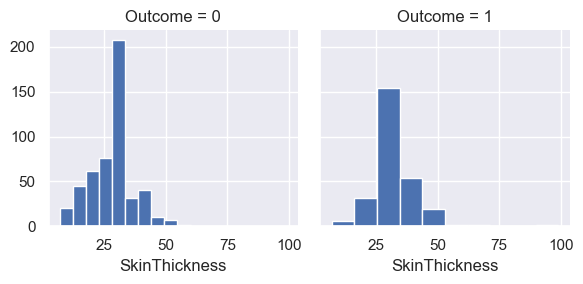

In [89]:
SkinThickness=sns.FacetGrid(df1,col='Outcome')
SkinThickness.map(plt.hist,'SkinThickness')

### Blood Pressure

In [65]:
df1['BloodPressure'].mean()

72.40518417462482

In [66]:
df1['BloodPressure'].min()

24.0

In [67]:
df1['BloodPressure'].max()

122.0

* The maximum value of Diastolic Blood Pressure shows that there are a possibility of some women to have hypertension (>90 mmHg) 

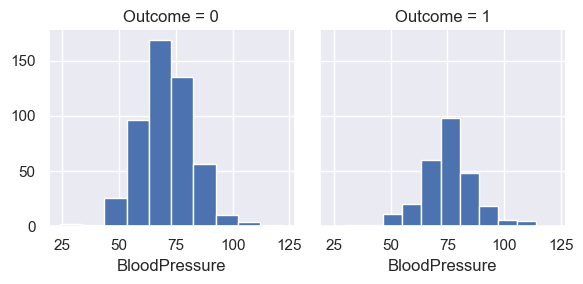

In [90]:
BloodPressure=sns.FacetGrid(df1,col='Outcome')
BloodPressure.map(plt.hist,'BloodPressure')

### Insulin

In [68]:
df1['Insulin'].mean()

140.671875

* The average value of 2h insulin of the samples show a normal range. (16 to 166 mIU/L)

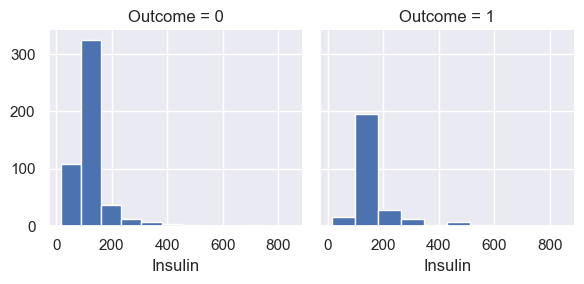

In [91]:
Insulin=sns.FacetGrid(df1,col='Outcome')
Insulin.map(plt.hist,'Insulin')

### BMI

In [69]:
df1['BMI'].mean()

32.45520833333333

* The average value of BMI indicates obesity (BMI >= 30 kg/m2)

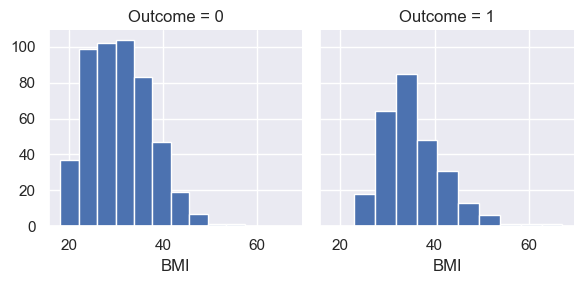

In [92]:
BMI=sns.FacetGrid(df1,col='Outcome')
BMI.map(plt.hist,'BMI')

## Data Visualization

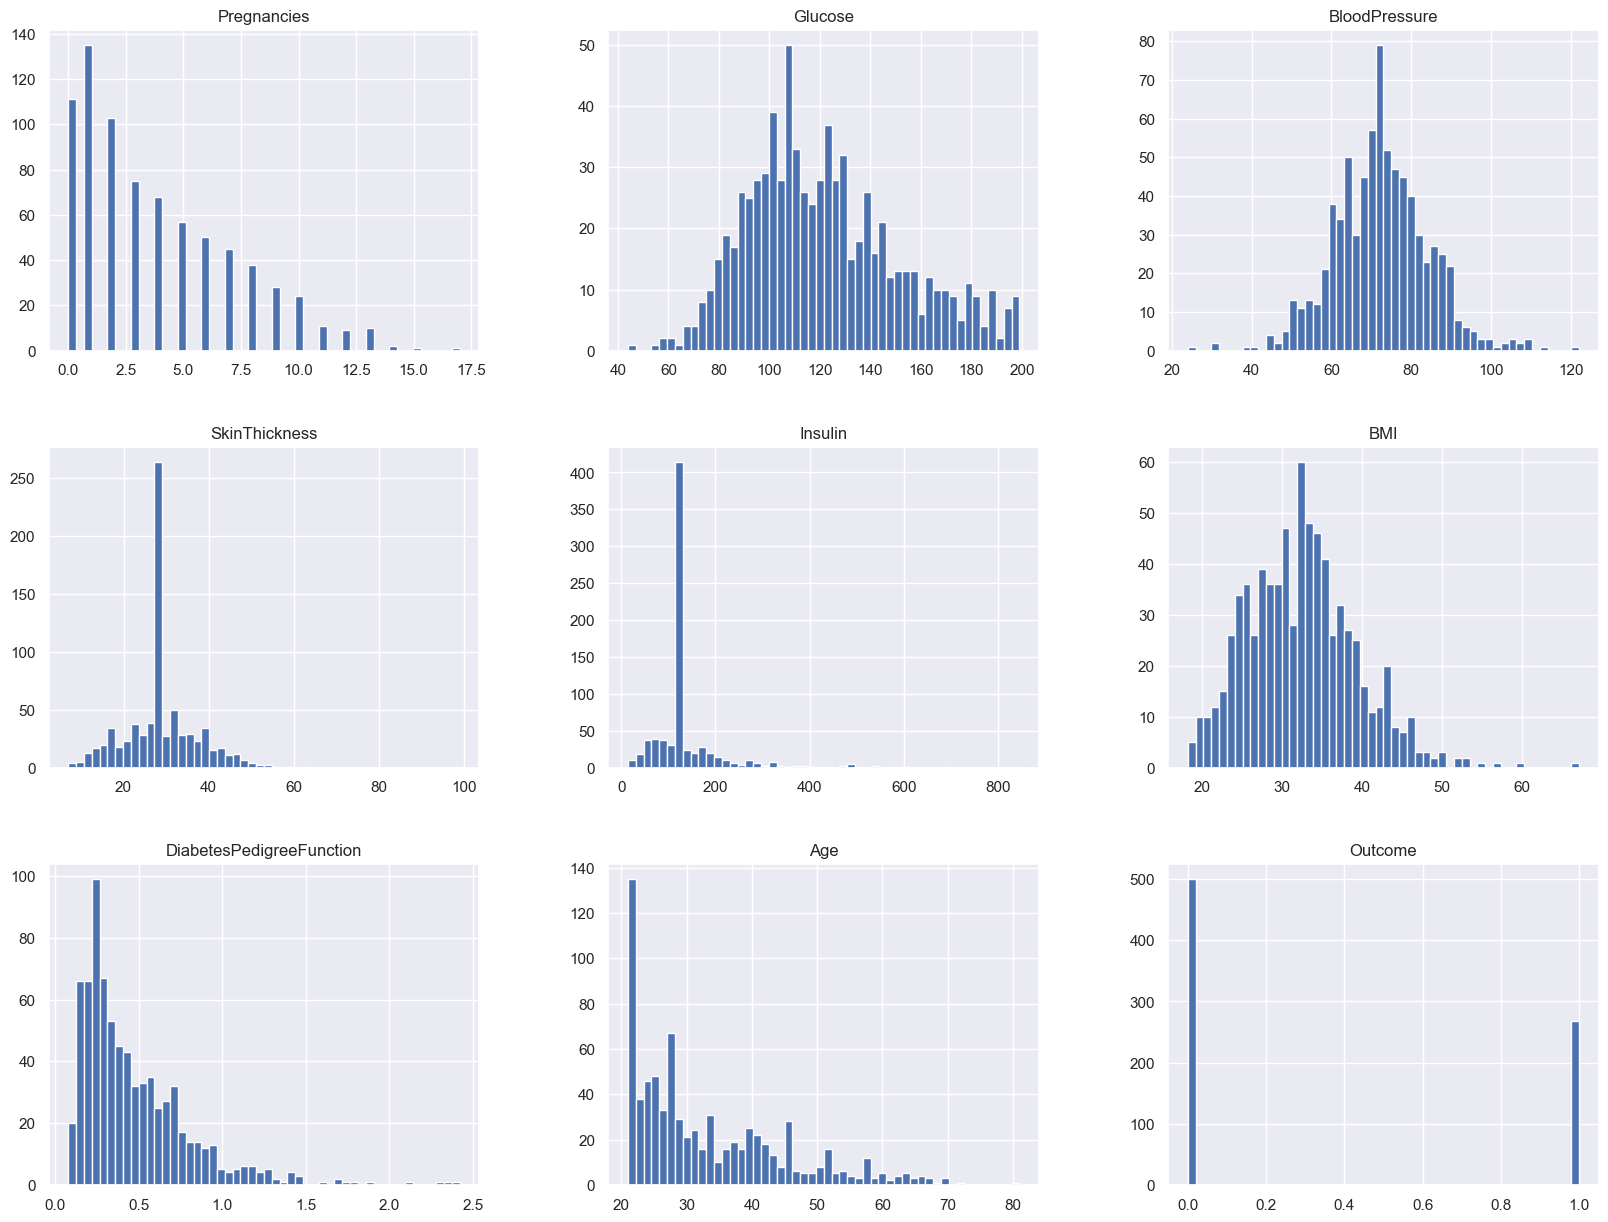

In [70]:
# Histogram
df1.hist(bins=50, figsize=(20, 15))
plt.show()

### Distribution Plot

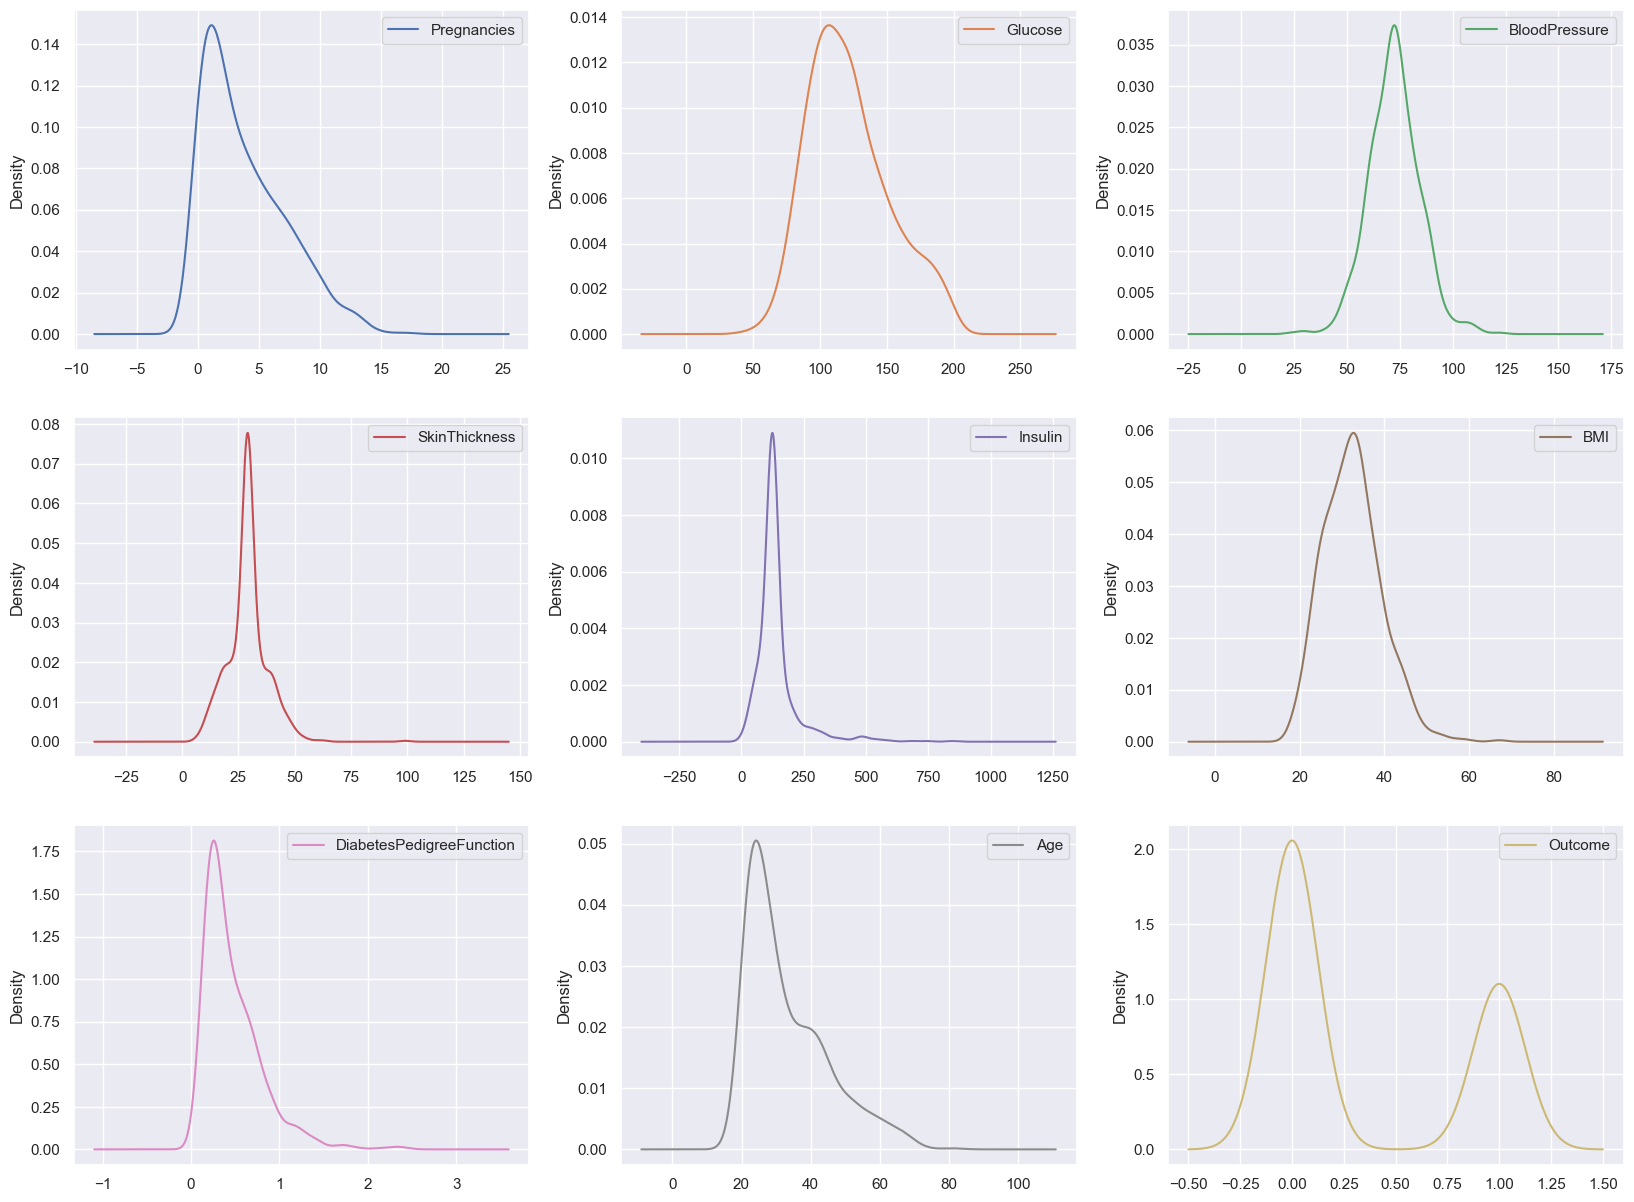

In [71]:
df1.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

### Box Plot

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

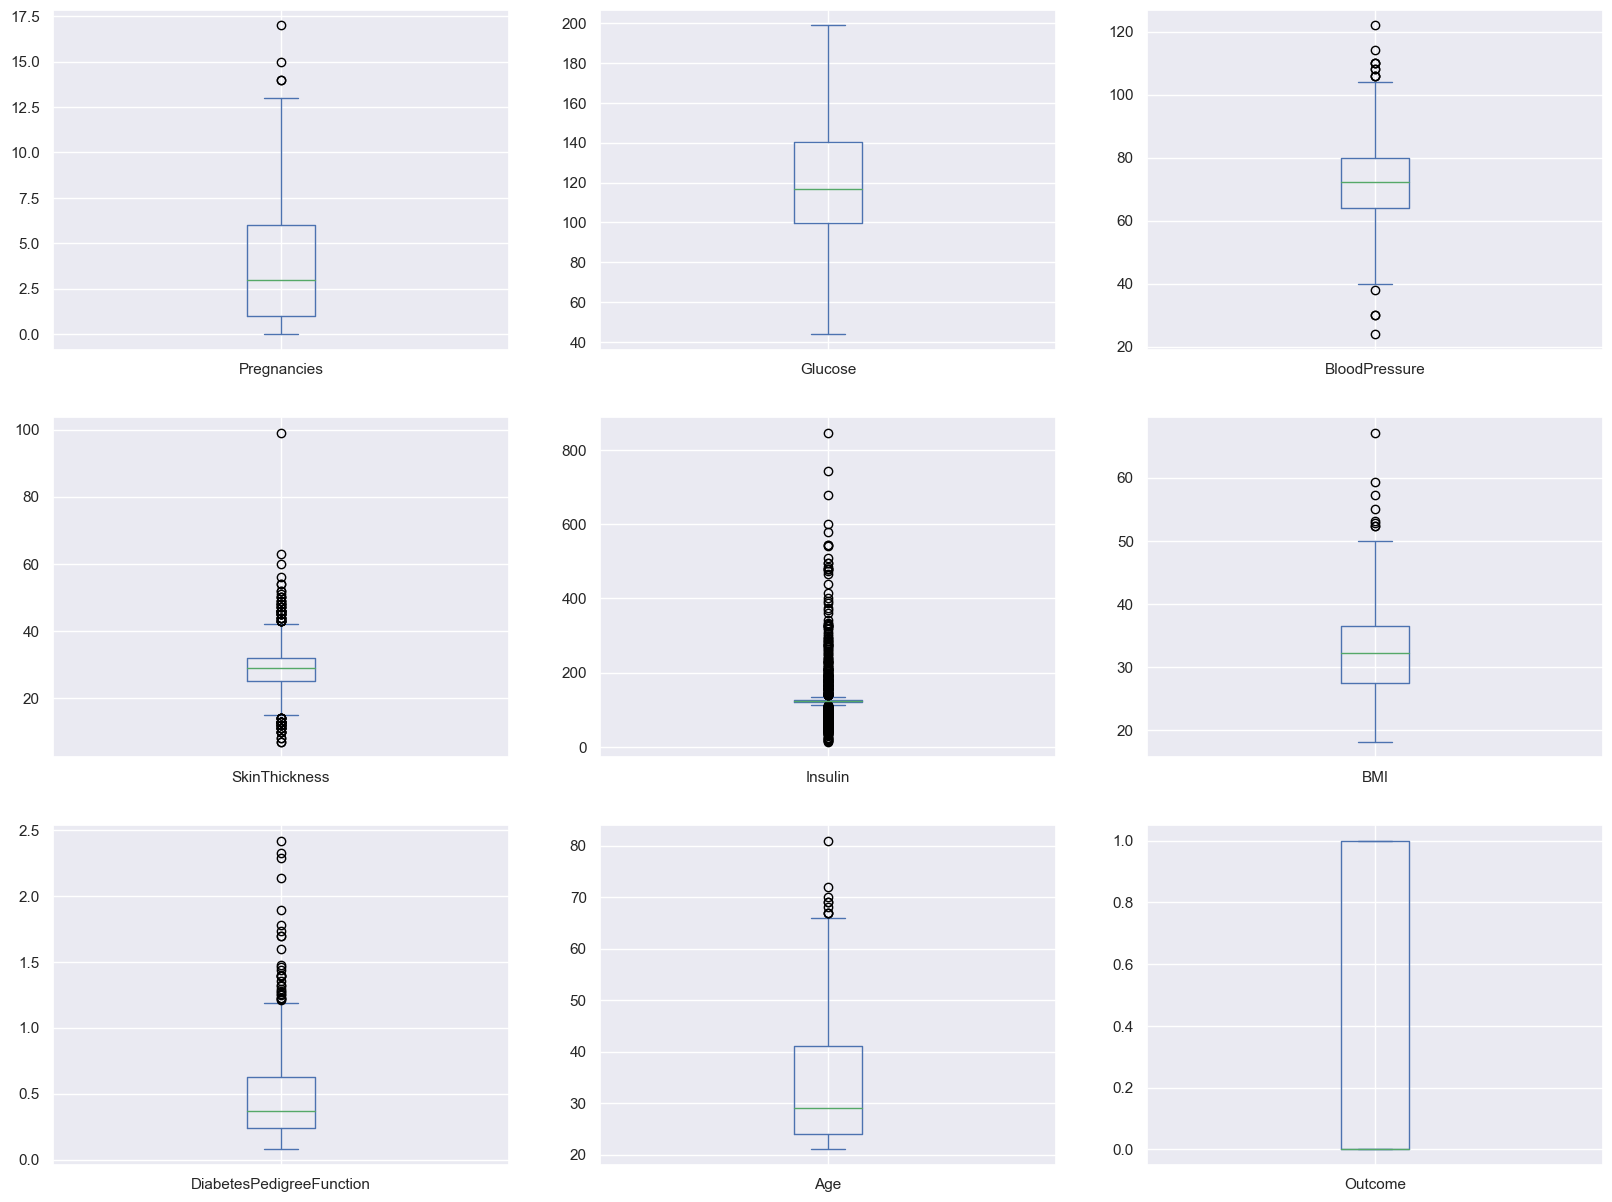

In [72]:
df1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [73]:
#Skew of attributes distributions
skew=df1.skew(axis = 1)

In [74]:
skew

0      0.921937
1      1.015506
2      1.468154
3      0.711041
4      1.339072
         ...   
763    1.228541
764    0.904054
765    0.907577
766    0.915431
767    0.935570
Length: 768, dtype: float64

* Bell shape curve: Blood Pressure
* Right-Skewed: Age, Insulin, Pregnancies, Diabetes Pedigree Function
* Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI
* At least 75% of the women:
1. are 25 years old or older
2. have BMI nearly 30 kg/m2
3. have insulin level 100 or more
4. have 1 or more pregnancies
5. have glucose level of 100 mg/dL or more
6. have blood pressure of 60 mmHg or more

### Pairplot

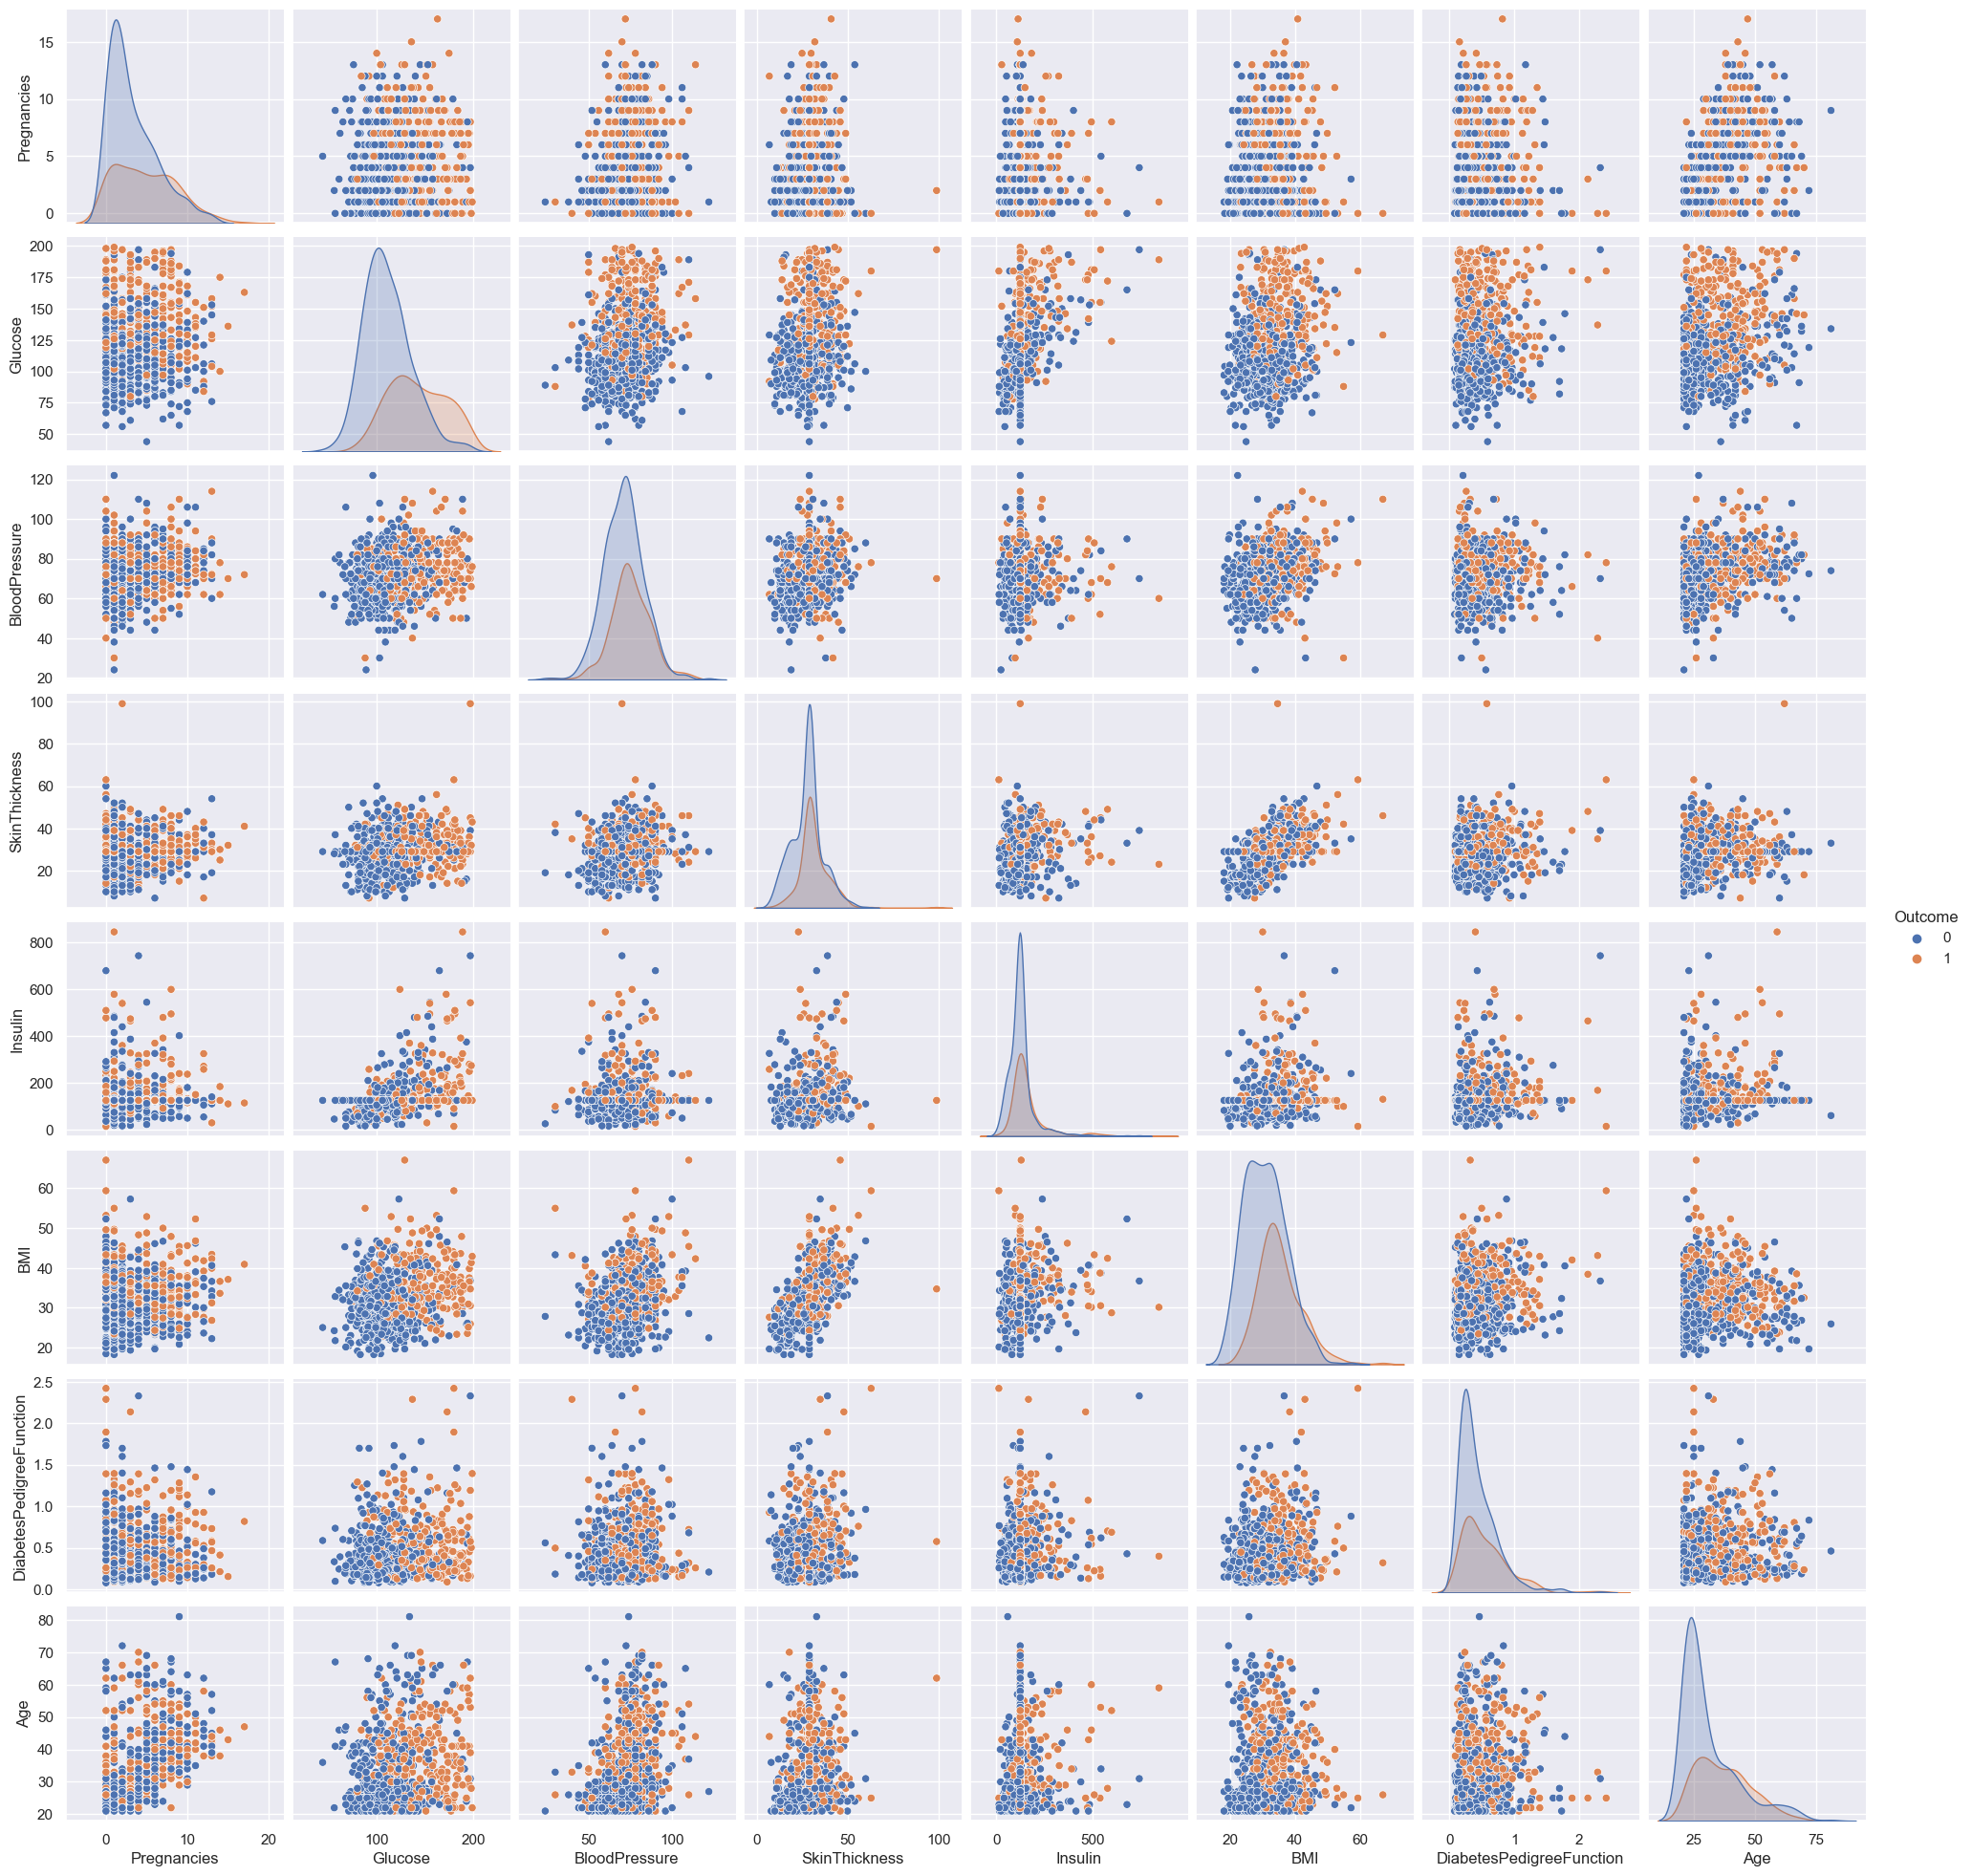

In [77]:
sns.pairplot(df1, hue='Outcome')

# Correlation between all the features

### corr_matrix

In [75]:
corr_matrix = df1.corr(method='pearson')
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


* There are no strong correlation between the features. The 'strongest' ones are the following (as expected):
* Age x pregnancies (0.54) - Older women tend to have higher number of pregnancies
* Glucose x insulin (0.41) Glucose x outcome (0.49) - Women that have higher level of glucose tend to have higher level of insulin and have Diabetes
* Skin fold thickness x BMI (0.54) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)
* Negative correlation:
*Diabetes Pedigree Function x Pregnancies (-0.033)
* Blood Pressure x Diabetes Pedigree Function (-0.002)

<Axes: >

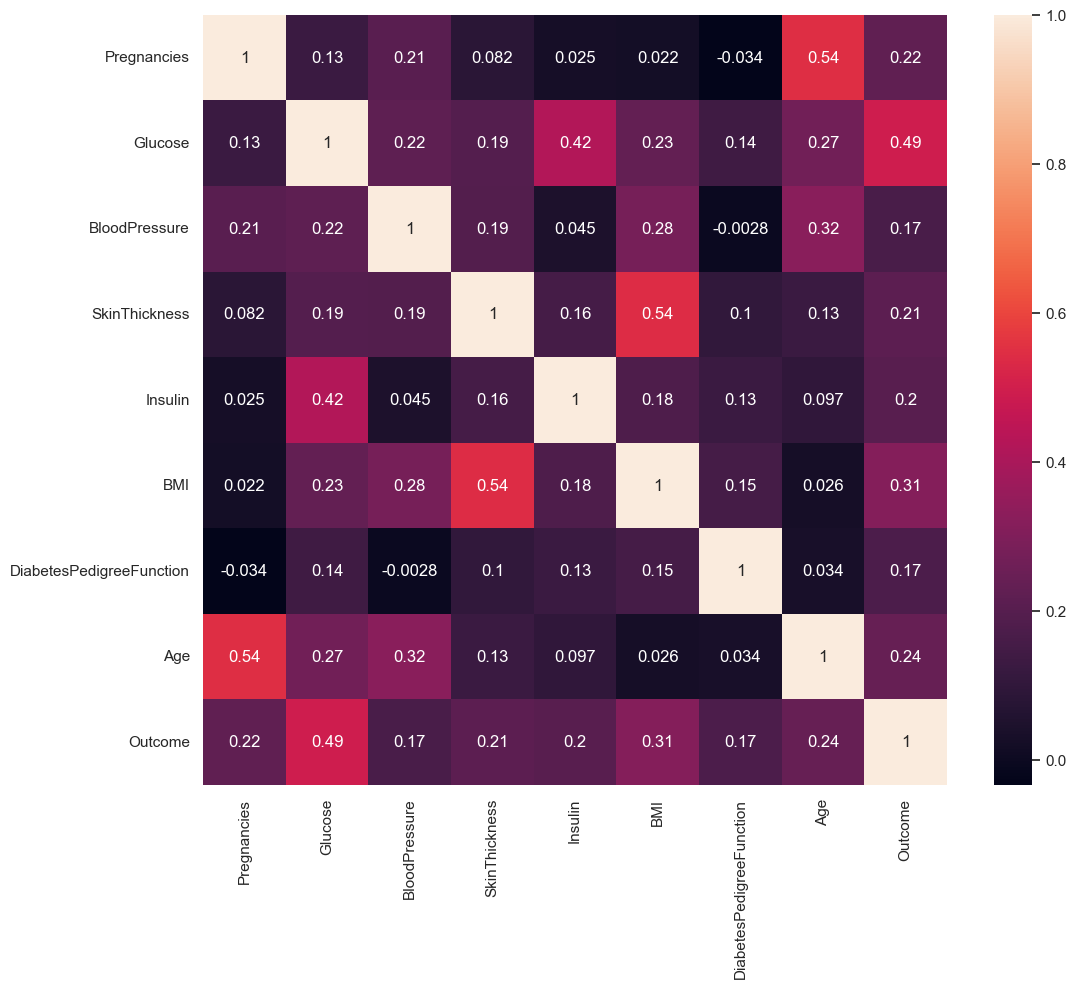

In [76]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True)

## Separating the Features and Target

In [93]:
df1.columns

Index(['Pregnancies', 'Glucose', 'Glucose Result', 'BloodPressure',
       'Percentile skin thickness', 'SkinThickness', 'Insulin', 'BMI',
       'Nutritional Status', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [94]:
df1.head()

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,Impaired Glucose Tolerance,72.0,17 P90th - P95th,35.0,125.0,33.6,Obese,0.627,50,1
1,1,85.0,Normal,66.0,12 P75th,29.0,125.0,26.6,Overweight,0.351,31,0
2,8,183.0,Impaired Glucose Tolerance,64.0,12 P75th,29.0,125.0,23.3,Normal,0.672,32,1
3,1,89.0,Normal,66.0,9 P25th - P50th,23.0,94.0,28.1,Overweight,0.167,21,0
4,0,137.0,Normal,40.0,17 P90th - P95th,35.0,168.0,43.1,Obese,2.288,33,1


In [96]:

X = df1.drop(columns=['Outcome', 'Glucose Result', 'Percentile skin thickness', 'Nutritional Status'], axis=1)
Y = df1['Outcome']

In [97]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [98]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Data Preprocessing

### Standardization

In [99]:
scaler = StandardScaler()

In [100]:
scaler.fit(X)

StandardScaler()

In [101]:
standardized_data = scaler.transform(X)

In [102]:
print(standardized_data)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [103]:
X_sc = standardized_data

In [104]:
print(X_sc)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


## Train Test Split

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sc,Y, test_size = 0.2, stratify=Y, random_state=2)

In [107]:
print(X_sc.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the Model

## K Neighbor Classifier

In [160]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [161]:
#training the support vector Machine Classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Accuracy Score

In [162]:
# accuracy score on the training data
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [163]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8192182410423453


In [164]:
# accuracy score on the test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [165]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6948051948051948


### Evaluation:

In [166]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[86 14]
 [33 21]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       100
           1       0.60      0.39      0.47        54

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.68      0.69      0.68       154



## Support Vector Machine

In [108]:
classifier = svm.SVC(kernel='linear')

In [109]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy Score

In [110]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [111]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [129]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [130]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


### Evaluation:

In [131]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[91  9]
 [27 27]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



## Decision Tree

In [133]:
dtree = DecisionTreeClassifier()

In [135]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [136]:
# accuracy score on the training data
X_train_prediction = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [137]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [138]:
# accuracy score on the test data
X_test_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [139]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6818181818181818


* model is overfitted.

### Evaluation:

In [140]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[83 17]
 [32 22]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       100
           1       0.56      0.41      0.47        54

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.67      0.68      0.67       154



## RandomForest

In [116]:
rfc = RandomForestClassifier(n_estimators=200)

In [118]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [119]:
# accuracy score on the training data
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [120]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [125]:
# accuracy score on the test data
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [126]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


* model is overfitted.

### Evaluation:

In [128]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[87 13]
 [25 29]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



 ## XgBoost

In [141]:
 xgb_model = XGBClassifier(gamma=0) 

In [142]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
# accuracy score on the training data
X_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [144]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [147]:
# accuracy score on the test data
X_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [148]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


* model is overfitted.

### Evaluation:

In [149]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[81 19]
 [19 35]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



**SVM is the best model for this prediction since it has an accuracy_score of 0.76.**

## Cross Validation

### Recursive feature elimination 

In [169]:

# Define KFold
kf = KFold(n_splits=10, shuffle=False, random_state=None)


In [171]:
skf = StratifiedKFold(n_splits=10, random_state=None)

In [172]:
classifier = svm.SVC(kernel='linear')

In [178]:
rfecv = RFECV (estimator=classifier,step=1, cv=skf, scoring='accuracy')

In [179]:
rfecv.fit(X,Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

### Feature Importance

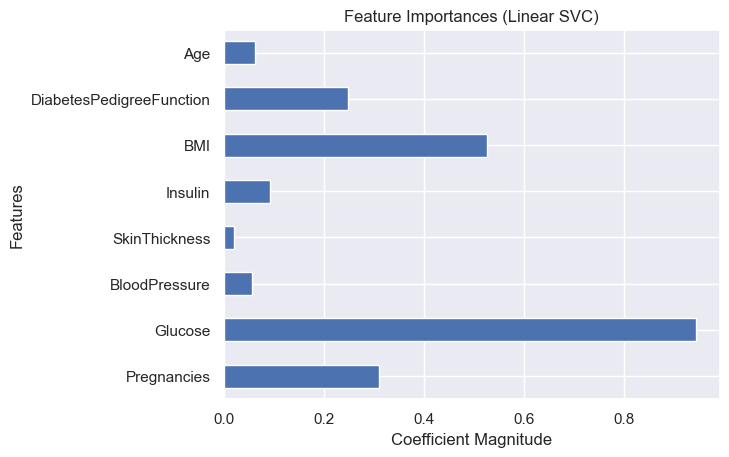

In [155]:
# Extracting feature coefficients (only applicable for linear kernel)
coefficients = classifier.coef_[0]

# Creating a pandas Series with feature importances
feature_importance = pd.Series(abs(coefficients), index=X.columns)

# Plotting feature importances
feature_importance.plot(kind='barh')
plt.title("Feature Importances (Linear SVC)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

**Glucose as a feature is the most important in this datase**

In [181]:
feature_names = X.columns[:10]
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [183]:
X1 = X[feature_names]

In [184]:
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True),
 ('Glucose', True),
 ('SkinThickness', True),
 ('BMI', True),
 ('DiabetesPedigreeFunction', True)]

These are the important features

In [189]:
X_new = df1[['Pregnancies','Glucose', 'BloodPressure','SkinThickness']]

In [190]:
scaler.fit(X_new)

StandardScaler()

In [191]:
standardized_data = scaler.transform(X_new)

In [192]:
Xnew_sc = standardized_data

In [193]:
Xnew_sc

array([[ 0.63994726,  0.86510807, -0.03351824,  0.67064253],
       [-0.84488505, -1.20616153, -0.52985903, -0.01230129],
       [ 1.23388019,  2.0158134 , -0.69530596, -0.01230129],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, -0.69524511],
       [-0.84488505,  0.14180757, -1.02619983, -0.01230129],
       [-0.84488505, -0.94314317, -0.19896517,  0.21534665]])

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(Xnew_sc,Y, test_size = 0.2, stratify=Y, random_state=2)

In [195]:
print(Xnew_sc.shape, X_train.shape, X_test.shape)

(768, 4) (614, 4) (154, 4)


In [216]:
classifier = svm.SVC(kernel='linear',probability=True)

In [217]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [218]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [219]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.750814332247557


In [220]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [221]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


### Evaluation:

In [208]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[91  9]
 [30 24]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.73      0.44      0.55        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



### ROC Curve

ROC AUC is a performance metric that measures the area under the ROC curve. It provides a single scalar value that represents the model's ability to discriminate between positive and negative classes across different thresholds. A value closer to 1 indicates better discrimination, while a value of 0.5 suggests random guessing.

In [209]:
# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = classifier.predict_proba(X_test)[:, 1]


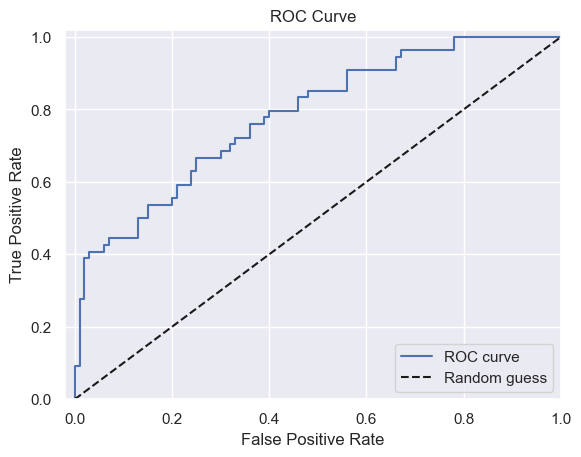

In [210]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()


In [211]:
ras = roc_auc_score(Y_test, out_pred_prob)
ras

0.7822222222222223

**A ROC AUC score of approximately 0.7822 indicates that this SVM classifier has moderate discrimination ability.**

### Precision-recall curve

Average Precision (AP) is a performance metric used to evaluate the quality of a binary classification model, particularly in cases where the classes are imbalanced. It summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

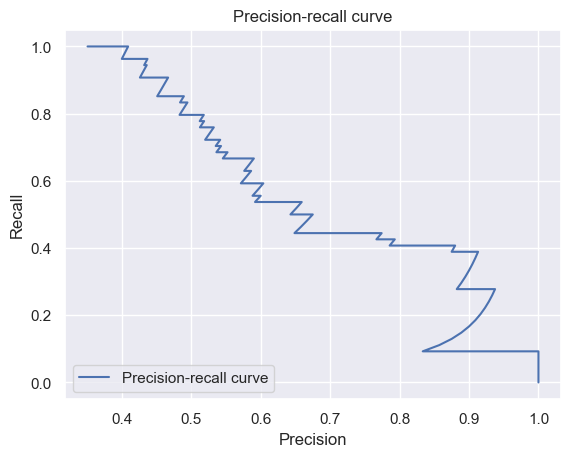

In [213]:
precision, recall, thresholds = precision_recall_curve(Y_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [214]:
aps = average_precision_score(Y_test, out_pred_prob)
aps

0.7052309352299042

**An APS of approximately 0.70 suggests that this SVM classifier achieves a moderate level of precision across all recall levels.**

## Prediction

In [151]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


### Saving Model

In [158]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)